<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Dahemo76/blob/main/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerias

In [1]:
import pandas as pd
import datetime
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Importamos nuestro input

In [2]:
#Archivo unificado y validado por cliente
df = pd.read_csv("input_final.csv", sep=',', encoding ="latin-1")
df.head(5)

,DOCUMENTO,PRIORIDAD,MOTIVO_NO_PAGO,DESC_ACTIVIDAD,GENERO,EDAD,HORA,HORA_OK,RANGO_HORA,RANGO_HORA2,...,PRIM_CTA,MORA_TEMPRANA,MANTENIDO,ACCION_MEJOR_CONTACTO,EFECTO_MEJOR_CONTACTO,NEGOCIACION_ACTIVA,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,MARCA_TIPO_CARTERA
0,11000000821,5,NO MOTIVO,Â Asalariados.,F,23,15:45:12,15,Tarde,Tarde,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG
1,11000000821,5,NO MOTIVO,Â Asalariados.,F,23,9:50:27,9,Mañana,Mañana,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG
2,11000000821,21,ASA_REDUCCION_INGRESOS,Â Asalariados.,F,23,9:49:51,9,Mañana,Mañana,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG
3,11000000821,5,SIN_ACCESO_A_CANALES,Â Asalariados.,F,23,10:02:47,10,Mañana,Mañana,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG
4,11000000821,5,ASA_REDUCCION_INGRESOS,Â Asalariados.,F,23,14:23:01,14,Tarde,Mediodia,...,X,X,X,HACER LLAMADA,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG


In [3]:
df.describe()

,DOCUMENTO,PRIORIDAD,EDAD,HORA_OK,MORA_INICIAL,MORA_ACTUAL,C_RIESGO,DIAS_ACTUAL,CICLO_OBLIG,CED_SIN_DIG,DIAS_OBLIG,DIAS_CL,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS
count,5.577290e+05,557729.000000,557729.000000,557729.000000,557729.000000,557729.000000,557729.000000,384371.000000,557729.000000,5.577290e+05,557729.000000,557729.000000,557729.000000,557729.000000,557729.000000
mean,5.019540e+09,12.822460,42.349327,11.882504,46.778041,45.762978,403.531993,53.681948,23.911335,5.017189e+08,33.561475,33.561475,39.161595,23.011113,3.013985
std,5.434164e+09,11.955382,13.697680,2.932931,21.423601,38.022923,338.879839,25.500609,8.803528,5.090475e+08,23.040940,23.040940,40.493347,36.705988,2.467757
min,1.859640e+05,0.000000,16.000000,6.000000,30.000000,0.000000,-99.000000,2.000000,0.000000,8.596400e+04,4.000000,4.000000,1.000000,0.000000,1.000000
25%,1.396569e+08,5.000000,32.000000,9.000000,30.000000,0.000000,65.000000,36.000000,16.000000,3.965690e+07,13.000000,13.000000,15.000000,2.000000,1.000000
50%,1.808310e+08,5.000000,40.000000,11.000000,30.000000,60.000000,391.000000,48.000000,31.000000,8.083096e+07,28.000000,28.000000,24.000000,6.000000,2.000000
75%,1.104574e+10,21.000000,52.000000,14.000000,60.000000,60.000000,702.000000,73.000000,31.000000,1.045741e+09,45.000000,45.000000,49.000000,31.000000,4.000000
max,1.200001e+10,52.000000,94.000000,19.000000,180.000000,210.000000,998.000000,184.000000,31.000000,2.000012e+09,165.000000,165.000000,620.000000,585.000000,24.000000


In [4]:
len(df)

557729

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557729 entries, 0 to 557728
Data columns (total 43 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DOCUMENTO                  557729 non-null  int64  
 1   PRIORIDAD                  557729 non-null  int64  
 2   MOTIVO_NO_PAGO             557729 non-null  object 
 3   DESC_ACTIVIDAD             557729 non-null  object 
 4   GENERO                     557729 non-null  object 
 5   EDAD                       557729 non-null  int64  
 6   HORA                       557729 non-null  object 
 7   HORA_OK                    557729 non-null  int64  
 8   RANGO_HORA                 557729 non-null  object 
 9   RANGO_HORA2                557729 non-null  object 
 10  SEGMENTO_CLIENTE           557729 non-null  object 
 11  RIESGO_ACTUAL              381931 non-null  object 
 12  RECUPERACION               557729 non-null  object 
 13  MORA_INICIAL               55

In [6]:
df.columns

Index(['DOCUMENTO', 'PRIORIDAD', 'MOTIVO_NO_PAGO', 'DESC_ACTIVIDAD', 'GENERO',
       'EDAD', 'HORA', 'HORA_OK', 'RANGO_HORA', 'RANGO_HORA2',
       'SEGMENTO_CLIENTE', 'RIESGO_ACTUAL', 'RECUPERACION', 'MORA_INICIAL',
       'MORA_ACTUAL', 'C_RIESGO', 'ESTADO_ICS_ACTUAL', 'DIAS_ACTUAL',
       'CICLO_OBLIG', 'CIUDAD', 'CED_SIN_DIG', 'NOMBRES', 'SUB_PRODUCTO',
       'SALDO_OBLIG', 'MORA_OBLIG', 'DIAS_OBLIG', 'TIPO_CLIENTE', 'SALDO_CL',
       'RANGO_SALDO', 'DIAS_CL', 'RANGO_CL', 'SCORE', 'F_APERTURA', 'PRIM_CTA',
       'MORA_TEMPRANA', 'MANTENIDO', 'ACCION_MEJOR_CONTACTO',
       'EFECTO_MEJOR_CONTACTO', 'NEGOCIACION_ACTIVA', 'CANTIDAD_GESTIONES',
       'GESTION_LLAMADAS', 'CONTEO_CONTACTOS_DIRECTOS', 'MARCA_TIPO_CARTERA'],
      dtype='object')

# **Columnas de identificación**

Los identificadores son nombres únicos que se asignan a elementos del programa, como variables, funciones, clases, etiquetas de instrucción, entre otros. Estos nombres sirven para referirse a esos elementos de manera clara y consistente en el código, haciendo que el programa sea más legible, comprensible y fácil de mantener

seleccionamos tres columnas específicas ('DOCUMENTO', 'CED_SIN_DIG' y 'NOMBRES') de los nombres de las columnas y las asignamos a un nuevo DataFrame llamado identificadores, estos no aportan datos significativos al modelo, pero nos permiten identicar los componentes de la tabla.


In [7]:
identificadores = df.loc[:,['DOCUMENTO','CED_SIN_DIG','NOMBRES']]
identificadores.head(5)

,DOCUMENTO,CED_SIN_DIG,NOMBRES
0,11000000821,1000000821,ANA . MALAVER RODRIGUEZ
1,11000000821,1000000821,ANA . MALAVER RODRIGUEZ
2,11000000821,1000000821,ANA . MALAVER RODRIGUEZ
3,11000000821,1000000821,ANA . MALAVER RODRIGUEZ
4,11000000821,1000000821,ANA . MALAVER RODRIGUEZ


# **Variables**

Las variables seleccionadas son : ***'PRIORIDAD', 'MOTIVO_NO_PAGO','DESC_ACTIVIDAD', 'GENERO', 'EDAD', 'SEGMENTO_CLIENTE', 'RIESGO_ACTUAL','RECUPERACION, 'MORA_INICIAL', 'MORA_ACTUAL', 'C_RIESGO', 'ESTADO_ICS_ACTUAL', 'DIAS_ACTUAL', 'CICLO_OBLIG', 'CIUDAD', 'SUB_PRODUCTO', 'SALDO_OBLIG', 'MORA_OBLIG', 'DIAS_OBLIG', 'TIPO_CLIENTE', 'SALDO_CL', 'RANGO_SALDO', 'DIAS_CL', 'RANGO_CL', 'SCORE', 'F_APERTURA', 'PRIM_CTA', 'MORA_TEMPRANA', 'MANTENIDO', 'ACCION_MEJOR_CONTACTO', 'EFECTO_MEJOR_CONTACTO', 'NEGOCIACION_ACTIVA', 'CANTIDAD_GESTIONES', 'GESTION_LLAMADAS', 'CONTEO_CONTACTOS_DIRECTOS', 'MARCA_TIPO_CARTERA', 'HORA', 'HORA_OK', 'RANGO_HORA' y 'RANGO_HORA2***

In [8]:
variables = df.loc[:,['PRIORIDAD', 'MOTIVO_NO_PAGO', 'DESC_ACTIVIDAD', 'GENERO','EDAD','SEGMENTO_CLIENTE', 'RIESGO_ACTUAL', 'RECUPERACION', 'MORA_INICIAL',
                     'MORA_ACTUAL', 'C_RIESGO', 'ESTADO_ICS_ACTUAL', 'DIAS_ACTUAL','CICLO_OBLIG', 'CIUDAD', 'SUB_PRODUCTO','SALDO_OBLIG', 'MORA_OBLIG',
                     'DIAS_OBLIG', 'TIPO_CLIENTE', 'SALDO_CL','RANGO_SALDO', 'DIAS_CL', 'RANGO_CL', 'SCORE', 'F_APERTURA', 'PRIM_CTA','MORA_TEMPRANA',
                     'MANTENIDO', 'ACCION_MEJOR_CONTACTO','EFECTO_MEJOR_CONTACTO', 'NEGOCIACION_ACTIVA', 'CANTIDAD_GESTIONES','GESTION_LLAMADAS',
                     'CONTEO_CONTACTOS_DIRECTOS', 'MARCA_TIPO_CARTERA', 'HORA', 'HORA_OK', 'RANGO_HORA', 'RANGO_HORA2']]
variables.head(5)

,PRIORIDAD,MOTIVO_NO_PAGO,DESC_ACTIVIDAD,GENERO,EDAD,SEGMENTO_CLIENTE,RIESGO_ACTUAL,RECUPERACION,MORA_INICIAL,MORA_ACTUAL,...,EFECTO_MEJOR_CONTACTO,NEGOCIACION_ACTIVA,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,MARCA_TIPO_CARTERA,HORA,HORA_OK,RANGO_HORA,RANGO_HORA2
0,5,NO MOTIVO,Â Asalariados.,F,23,MONO_TC,NaN,NORMALIZADO,30,0,...,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG,15:45:12,15,Tarde,Tarde
1,5,NO MOTIVO,Â Asalariados.,F,23,MONO_TC,NaN,NORMALIZADO,30,0,...,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG,9:50:27,9,Mañana,Mañana
2,21,ASA_REDUCCION_INGRESOS,Â Asalariados.,F,23,MONO_TC,NaN,NORMALIZADO,30,0,...,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG,9:49:51,9,Mañana,Mañana
3,5,SIN_ACCESO_A_CANALES,Â Asalariados.,F,23,MONO_TC,NaN,NORMALIZADO,30,0,...,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG,10:02:47,10,Mañana,Mañana
4,5,ASA_REDUCCION_INGRESOS,Â Asalariados.,F,23,MONO_TC,NaN,NORMALIZADO,30,0,...,YA PAGO,NO,9.0,1.0,1.0,PROD_DIG,14:23:01,14,Tarde,Mediodia


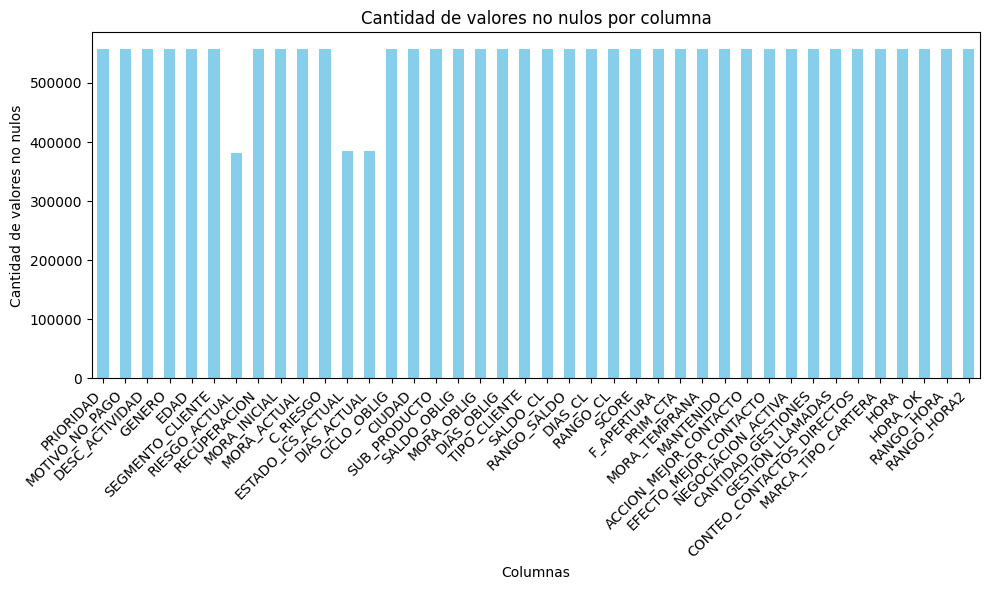

In [9]:
valores_no_nulos = variables.notnull().sum()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
valores_no_nulos.plot(kind='bar', color='skyblue')
plt.title('Cantidad de valores no nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores no nulos')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

In [10]:
variables.isnull().sum().sort_values(ascending=False)

RIESGO_ACTUAL                175798
ESTADO_ICS_ACTUAL            173358
DIAS_ACTUAL                  173358
PRIORIDAD                         0
SCORE                             0
F_APERTURA                        0
PRIM_CTA                          0
MORA_TEMPRANA                     0
MANTENIDO                         0
ACCION_MEJOR_CONTACTO             0
EFECTO_MEJOR_CONTACTO             0
NEGOCIACION_ACTIVA                0
DIAS_CL                           0
CANTIDAD_GESTIONES                0
GESTION_LLAMADAS                  0
CONTEO_CONTACTOS_DIRECTOS         0
MARCA_TIPO_CARTERA                0
HORA                              0
HORA_OK                           0
RANGO_HORA                        0
RANGO_CL                          0
SALDO_CL                          0
RANGO_SALDO                       0
MOTIVO_NO_PAGO                    0
DESC_ACTIVIDAD                    0
GENERO                            0
EDAD                              0
SEGMENTO_CLIENTE            

In [11]:
summary_statistics = variables.describe()
summary_statistics.head()

,PRIORIDAD,EDAD,MORA_INICIAL,MORA_ACTUAL,C_RIESGO,DIAS_ACTUAL,CICLO_OBLIG,DIAS_OBLIG,DIAS_CL,CANTIDAD_GESTIONES,GESTION_LLAMADAS,CONTEO_CONTACTOS_DIRECTOS,HORA_OK
count,557729.000000,557729.000000,557729.000000,557729.000000,557729.000000,384371.000000,557729.000000,557729.000000,557729.000000,557729.000000,557729.000000,557729.000000,557729.000000
mean,12.822460,42.349327,46.778041,45.762978,403.531993,53.681948,23.911335,33.561475,33.561475,39.161595,23.011113,3.013985,11.882504
std,11.955382,13.697680,21.423601,38.022923,338.879839,25.500609,8.803528,23.040940,23.040940,40.493347,36.705988,2.467757,2.932931
min,0.000000,16.000000,30.000000,0.000000,-99.000000,2.000000,0.000000,4.000000,4.000000,1.000000,0.000000,1.000000,6.000000
25%,5.000000,32.000000,30.000000,0.000000,65.000000,36.000000,16.000000,13.000000,13.000000,15.000000,2.000000,1.000000,9.000000


# **Estadisticas descriptivas para variables numericas y categóricas**

In [12]:
desc_numericas = variables.describe()

# Estadísticas descriptivas para variables categóricas
desc_categoricas = {}
for columna in df.select_dtypes(include=['object']):
    desc_categoricas[columna] = df[columna].value_counts()

# Mostrar resultados
print("Estadísticas descriptivas para variables numéricas:")
print(desc_numericas)
print("\nEstadísticas descriptivas para variables categóricas:")
for columna, desc in desc_categoricas.items():
    print(f"\n{columna}:")
    print(desc)

Estadísticas descriptivas para variables numéricas:
           PRIORIDAD           EDAD   MORA_INICIAL    MORA_ACTUAL  \
count  557729.000000  557729.000000  557729.000000  557729.000000   
mean       12.822460      42.349327      46.778041      45.762978   
std        11.955382      13.697680      21.423601      38.022923   
min         0.000000      16.000000      30.000000       0.000000   
25%         5.000000      32.000000      30.000000       0.000000   
50%         5.000000      40.000000      30.000000      60.000000   
75%        21.000000      52.000000      60.000000      60.000000   
max        52.000000      94.000000     180.000000     210.000000   

            C_RIESGO    DIAS_ACTUAL    CICLO_OBLIG     DIAS_OBLIG  \
count  557729.000000  384371.000000  557729.000000  557729.000000   
mean      403.531993      53.681948      23.911335      33.561475   
std       338.879839      25.500609       8.803528      23.040940   
min       -99.000000       2.000000       0.000000

# **Outliers Variables Numéricas**

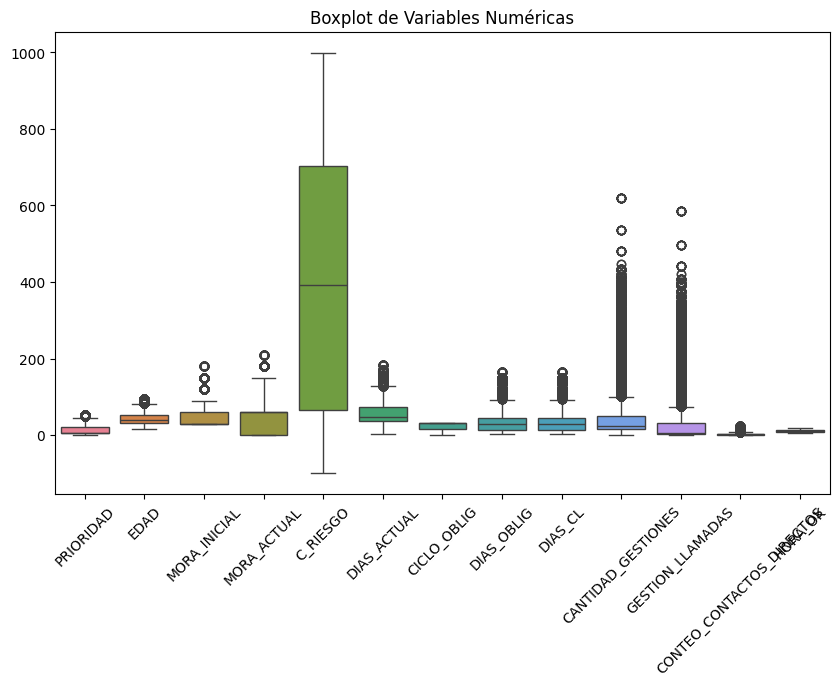

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=variables.select_dtypes(include='number'))
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.title('Boxplot de Variables Numéricas')
plt.show()

# Análisis para cada caso particular

## Valores faltantes

In [186]:
missing_data = variables.isnull().sum()
missing_data_percentage = (missing_data / len(variables)) * 100
missing_data_summary = pd.concat([missing_data, missing_data_percentage], axis=1, keys=['Total', 'Porcentaje'])
missing_data_df = pd.DataFrame(missing_data_summary, columns=['Total', 'Porcentaje'])

# Agregar un mensaje antes del DataFrame
total_records = len(variables)
message = f"De un total de {total_records} registros se encuentran los siguientes valores faltantes:\n"
print(message)
missing_data_df.head(50)

De un total de 557729 registros se encuentran los siguientes valores faltantes:



,Total,Porcentaje
PRIORIDAD,0,0.000000
MOTIVO_NO_PAGO,0,0.000000
DESC_ACTIVIDAD,0,0.000000
GENERO,0,0.000000
EDAD,0,0.000000
SEGMENTO_CLIENTE,0,0.000000
RIESGO_ACTUAL,175798,31.520326
RECUPERACION,0,0.000000
MORA_INICIAL,0,0.000000
MORA_ACTUAL,0,0.000000


In [187]:
variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557729 entries, 0 to 557728
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PRIORIDAD                  557729 non-null  int64  
 1   MOTIVO_NO_PAGO             557729 non-null  object 
 2   DESC_ACTIVIDAD             557729 non-null  object 
 3   GENERO                     557729 non-null  object 
 4   EDAD                       557729 non-null  int64  
 5   SEGMENTO_CLIENTE           557729 non-null  object 
 6   RIESGO_ACTUAL              381931 non-null  object 
 7   RECUPERACION               557729 non-null  object 
 8   MORA_INICIAL               557729 non-null  int64  
 9   MORA_ACTUAL                557729 non-null  int64  
 10  C_RIESGO                   557729 non-null  float64
 11  ESTADO_ICS_ACTUAL          384371 non-null  object 
 12  DIAS_ACTUAL                384371 non-null  float64
 13  CICLO_OBLIG                55

Relaciones entre variables categóricas y numéricas

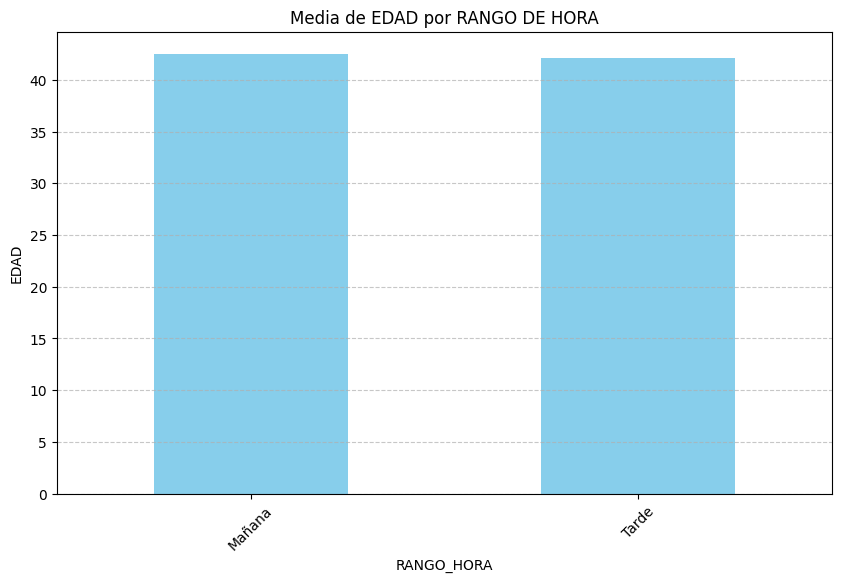

In [15]:
resumen_estadistico = variables.groupby('RANGO_HORA')['EDAD'].mean()  # O puedes usar 'median' en lugar de 'mean' si deseas la mediana

# Crear un gráfico de barras para mostrar la media o la mediana de la variable numérica para cada categoría
plt.figure(figsize=(10, 6))
resumen_estadistico.plot(kind='bar', color='skyblue')
plt.title('Media de EDAD por RANGO DE HORA')
plt.xlabel('RANGO_HORA')
plt.ylabel('EDAD')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de cuadrícula horizontal
plt.show()

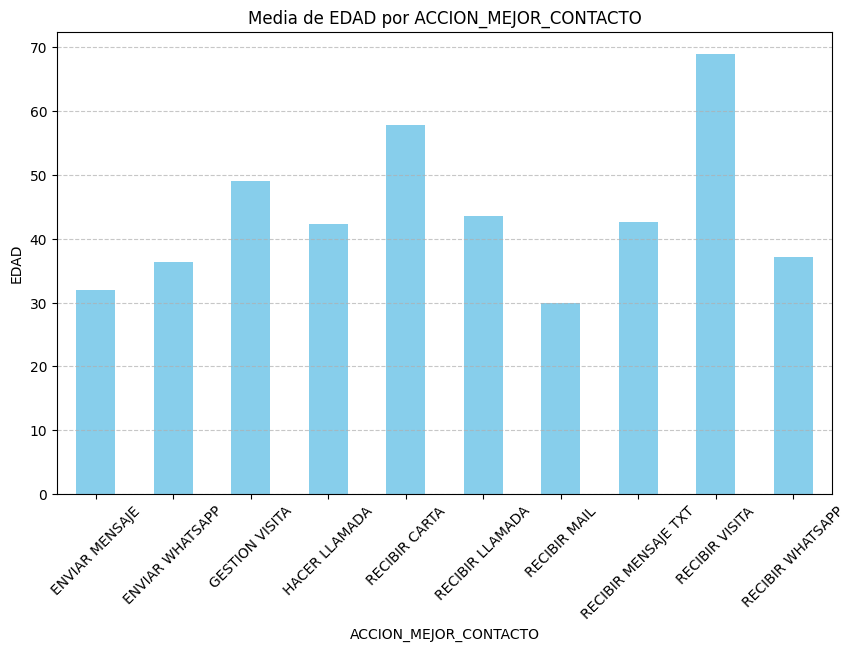

In [16]:
resumen_estadistico2 = variables.groupby('ACCION_MEJOR_CONTACTO')['EDAD'].mean()  # O puedes usar 'median' en lugar de 'mean' si deseas la mediana

# Crear un gráfico de barras para mostrar la media o la mediana de la variable numérica para cada categoría
plt.figure(figsize=(10, 6))
resumen_estadistico2.plot(kind='bar', color='skyblue')
plt.title('Media de EDAD por ACCION_MEJOR_CONTACTO')
plt.xlabel('ACCION_MEJOR_CONTACTO')
plt.ylabel('EDAD')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de cuadrícula horizontal
plt.show()

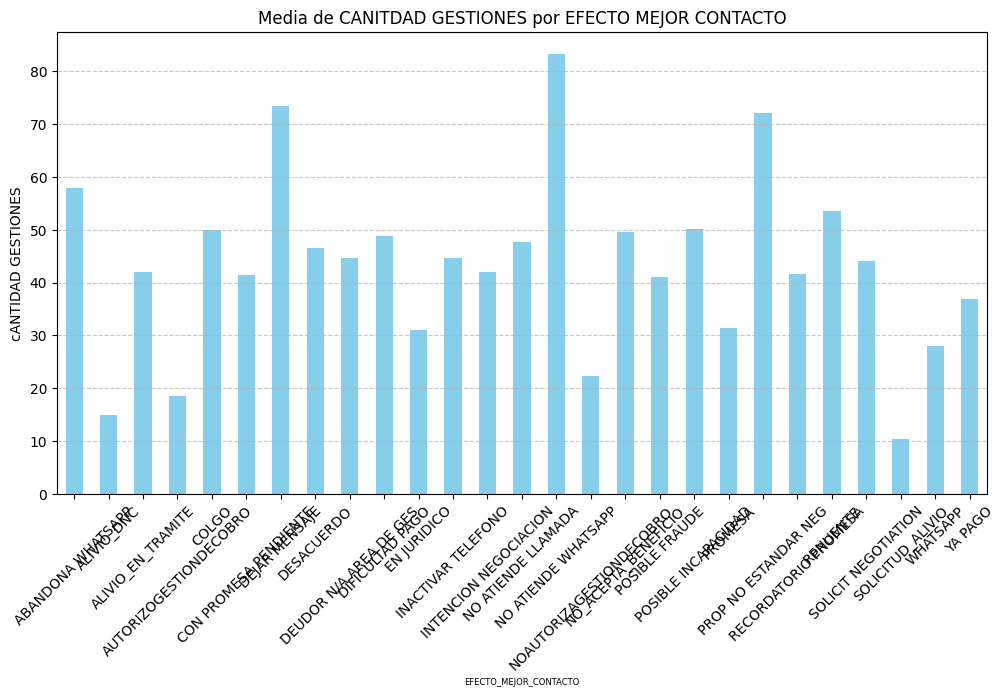

In [17]:
resumen_estadistico3 = variables.groupby('EFECTO_MEJOR_CONTACTO')['CANTIDAD_GESTIONES'].mean()  # O puedes usar 'median' en lugar de 'mean' si deseas la mediana

# Crear un gráfico de barras para mostrar la media o la mediana de la variable numérica para cada categoría
plt.figure(figsize=(12, 6))
resumen_estadistico3.plot(kind='bar', color='skyblue')
plt.title('Media de CANITDAD GESTIONES por EFECTO MEJOR CONTACTO')
plt.xlabel('EFECTO_MEJOR_CONTACTO', fontsize=6)
plt.ylabel('cANTIDAD GESTIONES')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de cuadrícula horizontal
plt.show()

## Resumen estadistico

### Cardinalidad de variables Categoricas

In [144]:
categorical_columns = variables.select_dtypes(include=['object']).columns
categorical_cardinality = pd.DataFrame(columns=['Columna', 'Cardinalidad'])
for col in categorical_columns:
    cardinality = variables[col].nunique()
    categorical_cardinality = categorical_cardinality._append({'Columna': col, 'Cardinalidad': cardinality}, ignore_index=True)
categorical_cardinality.head()

,Columna,Cardinalidad
0,MOTIVO_NO_PAGO,118
1,DESC_ACTIVIDAD,369
2,GENERO,3
3,SEGMENTO_CLIENTE,2
4,RIESGO_ACTUAL,11


In [145]:
# prompt: Mediante el marco de datos categorical_cardinality:

categorical_cardinality.groupby('Columna')['Cardinalidad'].sum()


Columna
ACCION_MEJOR_CONTACTO       10
CIUDAD                     179
DESC_ACTIVIDAD             369
EFECTO_MEJOR_CONTACTO       27
ESTADO_ICS_ACTUAL           12
F_APERTURA                4332
GENERO                       3
HORA                     39707
MANTENIDO                    2
MARCA_TIPO_CARTERA           3
MORA_OBLIG               64599
MORA_TEMPRANA                2
MOTIVO_NO_PAGO             118
NEGOCIACION_ACTIVA           2
PRIM_CTA                     2
RANGO_CL                     6
RANGO_HORA                   2
RANGO_HORA2                  3
RANGO_SALDO                  9
RECUPERACION                 5
RIESGO_ACTUAL               11
SALDO_CL                 64652
SALDO_OBLIG              64628
SCORE                     1030
SEGMENTO_CLIENTE             2
SUB_PRODUCTO                51
TIPO_CLIENTE                 8
Name: Cardinalidad, dtype: object

### Distribuciones sesgadas y transformaciones no lineales

In [146]:
numeric_columns = variables.select_dtypes(include=['float64', 'int64']).columns
skewed_distributions = pd.DataFrame(columns=['Columna', 'Skewness'])
for col in numeric_columns:
    skewness = skew(variables[col])
    skewed_distributions = skewed_distributions._append({'Columna': col, 'Skewness': skewness}, ignore_index=True)
skewed_distributions.head()

,Columna,Skewness
0,PRIORIDAD,1.718381
1,EDAD,0.567993
2,MORA_INICIAL,1.234191
3,MORA_ACTUAL,0.280818
4,C_RIESGO,0.134503


In [147]:
# prompt: Mediante el marco de datos skewed_distributions:

skewed_distributions.groupby('Columna')['Skewness'].agg(['min', 'max', 'mean'])


,min,max,mean
Columna,,,
CANTIDAD_GESTIONES,2.796073,2.796073,2.796073
CICLO_OBLIG,-0.959832,-0.959832,-0.959832
CONTEO_CONTACTOS_DIRECTOS,2.251372,2.251372,2.251372
C_RIESGO,0.134503,0.134503,0.134503
DIAS_ACTUAL,NaN,NaN,NaN
DIAS_CL,1.124326,1.124326,1.124326
DIAS_OBLIG,1.124326,1.124326,1.124326
EDAD,0.567993,0.567993,0.567993
GESTION_LLAMADAS,3.171082,3.171082,3.171082


### Desequilibrio en clases de variable objetivo

In [148]:
class_counts = variables['RANGO_HORA'].value_counts()
class_imbalance = pd.DataFrame({'Clase': class_counts.index, 'Frecuencia': class_counts.values})
class_imbalance

,Clase,Frecuencia
0,Mañana,340809
1,Tarde,216920


<Axes: xlabel='Clase'>

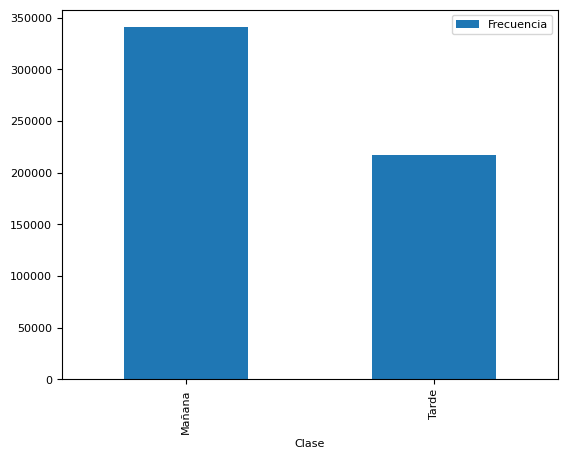

In [149]:
# prompt: Mediante el marco de datos class_imbalance:

class_imbalance.set_index('Clase').plot.bar()


# **Frecuencia de Clases para variables categóricas**

De acuerdo al análisis realizados, vamos a dejar unicamente las siguientes varianles como categóricas.

In [20]:
variables_categoricas = ['GENERO', 'SEGMENTO_CLIENTE', 'RECUPERACION', 'NEGOCIACION_ACTIVA', 'MARCA_TIPO_CARTERA']
df_interes = variables[variables_categoricas]

# Calcular la frecuencia de clases para cada columna
for columna in df_interes.columns:
    frecuencia = df_interes[columna].value_counts()
    print(f"Frecuencia de clases para {columna}:\n{frecuencia}\n")

Frecuencia de clases para GENERO:
GENERO
M    307280
F    250447
D         2
Name: count, dtype: int64

Frecuencia de clases para SEGMENTO_CLIENTE:
SEGMENTO_CLIENTE
MONO_TC     454759
MULTI_TC    102970
Name: count, dtype: int64

Frecuencia de clases para RECUPERACION:
RECUPERACION
DETERIORADO    235794
NORMALIZADO    173358
POR_VENCER      98527
MANTENIDO       34401
RECUPERADO      15649
Name: count, dtype: int64

Frecuencia de clases para NEGOCIACION_ACTIVA:
NEGOCIACION_ACTIVA
NO    488572
SI     69157
Name: count, dtype: int64

Frecuencia de clases para MARCA_TIPO_CARTERA:
MARCA_TIPO_CARTERA
FGA            254878
PROD_DIG       156128
TRADICIONAL    146723
Name: count, dtype: int64



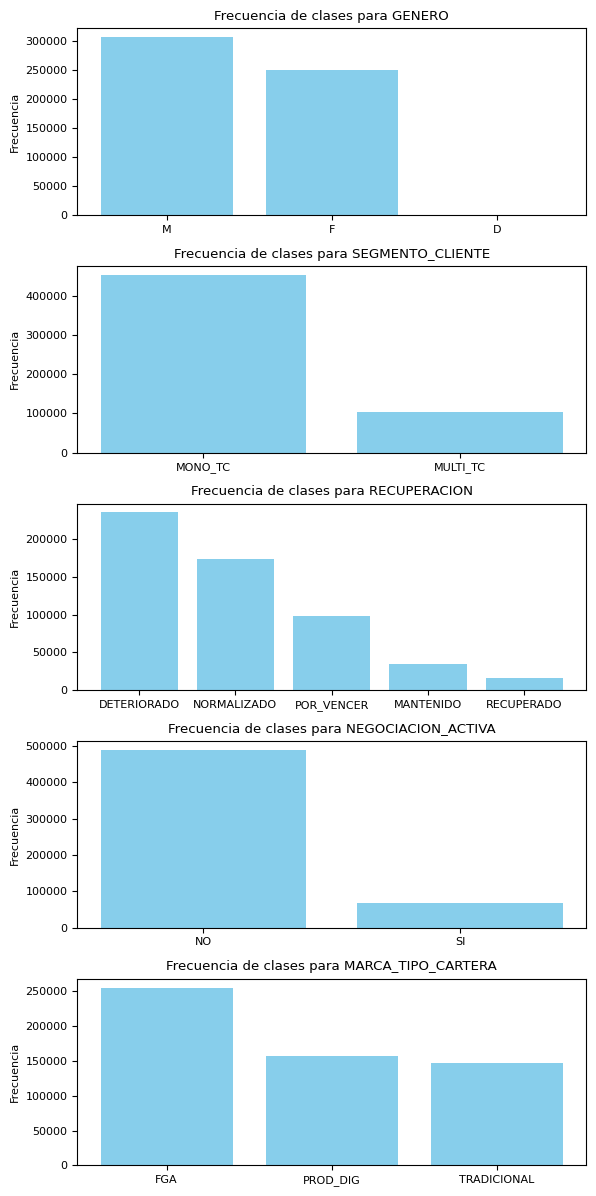

In [19]:
variables_categoricas = ['GENERO', 'SEGMENTO_CLIENTE', 'RECUPERACION', 'NEGOCIACION_ACTIVA', 'MARCA_TIPO_CARTERA']
df_interes = variables[variables_categoricas]

plt.figure(figsize=(6, 12))
plt.rcParams.update({'font.size': 8})  # Tamaño de la fuente

# Calcular y graficar la frecuencia de clases para cada columna
for i, columna in enumerate(df_interes.columns):
    frecuencia = df_interes[columna].value_counts()
    plt.subplot(len(variables_categoricas), 1, i+1)
    plt.bar(frecuencia.index, frecuencia.values, color='skyblue')
    plt.title(f"Frecuencia de clases para {columna}")
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()